In [1]:
# Importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Cores Airbnb
AIRBNB_RED = '#FF5A5F'
AIRBNB_DARK = '#484848'
AIRBNB_GRAY = '#767676'

print('✅ Bibliotecas importadas com sucesso!')

✅ Bibliotecas importadas com sucesso!


## 1. Carregamento dos Dados Brutos

In [2]:
# Carregar dados brutos
df_raw = pd.read_csv('dados_brutos.csv')

print(f"📦 Dataset carregado: {df_raw.shape[0]:,} linhas × {df_raw.shape[1]} colunas")
print(f"💾 Tamanho em memória: {df_raw.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

📦 Dataset carregado: 784,122 linhas × 108 colunas
💾 Tamanho em memória: 4986.96 MB


## 2. Visão Geral da Estrutura

In [3]:
# Primeiras linhas
print("📋 Primeiras 5 linhas do dataset:\n")
df_raw.head()

📋 Primeiras 5 linhas do dataset:



,Unnamed: 0,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,...,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,number_of_reviews_ltm,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,0.0,17878,https://www.airbnb.com/rooms/17878,2.018082e+13,2018-08-16,Very Nice 2Br - Copacabana - WiFi,Please note that special rates apply for New Y...,- large balcony which looks out on pedestrian ...,Please note that special rates apply for New Y...,none,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,24480,https://www.airbnb.com/rooms/24480,2.018082e+13,2018-08-16,Nice and cozy near Ipanema Beach,My studio is located in the best of Ipanema. ...,The studio is located at Vinicius de Moraes St...,My studio is located in the best of Ipanema. ...,none,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,25026,https://www.airbnb.com/rooms/25026,2.018082e+13,2018-08-16,Beautiful Modern Decorated Studio in Copa,"Our apartment is a little gem, everyone loves ...",This newly renovated studio (last renovations ...,"Our apartment is a little gem, everyone loves ...",none,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,31560,https://www.airbnb.com/rooms/31560,2.018082e+13,2018-08-16,NICE & COZY 1BDR - IPANEMA BEACH,This nice and clean 1 bedroom apartment is loc...,This nice and clean 1 bedroom apartment is loc...,This nice and clean 1 bedroom apartment is loc...,none,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,35636,https://www.airbnb.com/rooms/35636,2.018082e+13,2018-08-16,Cosy flat close to Ipanema beach,This cosy apartment is just a few steps away ...,"The location is extremely convenient, safe and...",This cosy apartment is just a few steps away ...,none,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Informações do dataset
print("ℹ️ Informações do Dataset:\n")
df_raw.info()

ℹ️ Informações do Dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 784122 entries, 0 to 784121
Columns: 108 entries, Unnamed: 0 to calculated_host_listings_count_shared_rooms
dtypes: float64(36), object(72)
memory usage: 646.1+ MB


In [5]:
# Estatísticas descritivas
print("📊 Estatísticas Descritivas - Variáveis Numéricas:\n")
df_raw.describe()

📊 Estatísticas Descritivas - Variáveis Numéricas:



,Unnamed: 0,scrape_id,thumbnail_url,neighbourhood_group_cleansed,latitude,longitude,bathrooms,bedrooms,beds,square_feet,...,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,number_of_reviews_ltm,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
count,784121.000000,7.841210e+05,0.0,1.0,784121.000000,784121.000000,782628.000000,783346.000000,781787.000000,12018.000000,...,600998.000000,600998.000000,6.009980e+05,6.009980e+05,600998.000000,6.009980e+05,600998.000000,600998.000000,600998.000000,600998.000000
mean,17835.096665,2.019061e+13,NaN,1.0,-22.965138,-43.253676,1.693265,1.644332,2.595179,511.095357,...,4.600113,5.082987,1.617609e+04,1.618091e+04,4.719624,1.617820e+04,3.028371,6.132533,0.741041,0.094549
std,10314.349073,6.566995e+09,NaN,NaN,0.082272,0.137738,1.224674,1.076565,2.073158,937.135284,...,20.762523,21.450985,3.870406e+06,3.870406e+06,20.906698,3.870406e+06,7.496478,26.557486,1.779124,0.774643
min,0.000000,2.018082e+13,NaN,1.0,-23.073400,-43.738920,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,8910.000000,2.019012e+13,NaN,1.0,-22.984680,-43.322350,1.000000,1.000000,1.000000,0.000000,...,1.000000,1.000000,3.000000e+01,3.000000e+01,1.000000,3.000000e+01,0.000000,1.000000,0.000000,0.000000
50%,17820.000000,2.019062e+13,NaN,1.0,-22.970650,-43.200040,1.000000,1.000000,2.000000,194.000000,...,2.000000,3.000000,1.125000e+03,1.125000e+03,2.200000,1.125000e+03,0.000000,1.000000,0.000000,0.000000
75%,26731.000000,2.019122e+13,NaN,1.0,-22.945660,-43.186930,2.000000,2.000000,3.000000,753.000000,...,4.000000,5.000000,1.125000e+03,1.125000e+03,4.000000,1.125000e+03,2.000000,2.000000,1.000000,0.000000
max,38173.000000,2.020052e+13,NaN,1.0,43.000000,43.000000,200.000000,45.000000,86.000000,10764.000000,...,1095.000000,1095.000000,1.000000e+09,1.000000e+09,1095.000000,1.000000e+09,127.000000,322.000000,40.000000,23.000000


## 3. Análise de Valores Ausentes

In [6]:
# Calcular valores ausentes
missing_data = pd.DataFrame({
    'Coluna': df_raw.columns,
    'Valores_Ausentes': df_raw.isnull().sum(),
    'Percentual': (df_raw.isnull().sum() / len(df_raw) * 100).round(2)
}).sort_values('Percentual', ascending=False)

missing_data = missing_data[missing_data['Valores_Ausentes'] > 0]

print(f"🔍 Total de colunas com valores ausentes: {len(missing_data)}\n")
print(missing_data.head(20))

🔍 Total de colunas com valores ausentes: 101

                                                    Coluna  Valores_Ausentes  \
neighbourhood_group_cleansed  neighbourhood_group_cleansed            784121   
thumbnail_url                                thumbnail_url            784122   
xl_picture_url                              xl_picture_url            784121   
medium_url                                      medium_url            784121   
jurisdiction_names                      jurisdiction_names            784122   
license                                            license            784082   
square_feet                                    square_feet            772104   
weekly_price                                  weekly_price            720022   
monthly_price                                monthly_price            713520   
host_acceptance_rate                  host_acceptance_rate            689379   
notes                                                notes            5336

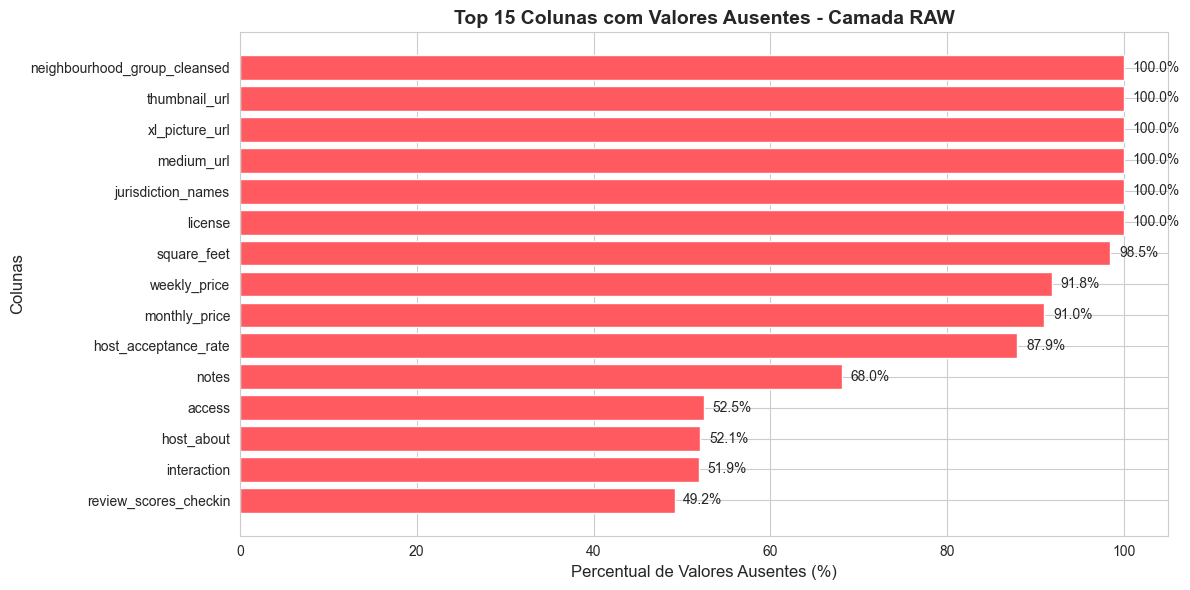

In [7]:
# Visualizar valores ausentes
if len(missing_data) > 0:
    top_missing = missing_data.head(15)
    
    plt.figure(figsize=(12, 6))
    plt.barh(top_missing['Coluna'], top_missing['Percentual'], color=AIRBNB_RED)
    plt.xlabel('Percentual de Valores Ausentes (%)', fontsize=12)
    plt.ylabel('Colunas', fontsize=12)
    plt.title('Top 15 Colunas com Valores Ausentes - Camada RAW', fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    
    for i, (idx, row) in enumerate(top_missing.iterrows()):
        plt.text(row['Percentual'] + 1, i, f"{row['Percentual']:.1f}%", va='center')
    
    plt.tight_layout()
    plt.show()
else:
    print("✅ Nenhum valor ausente encontrado!")

## 4. Análise de Tipos de Propriedade

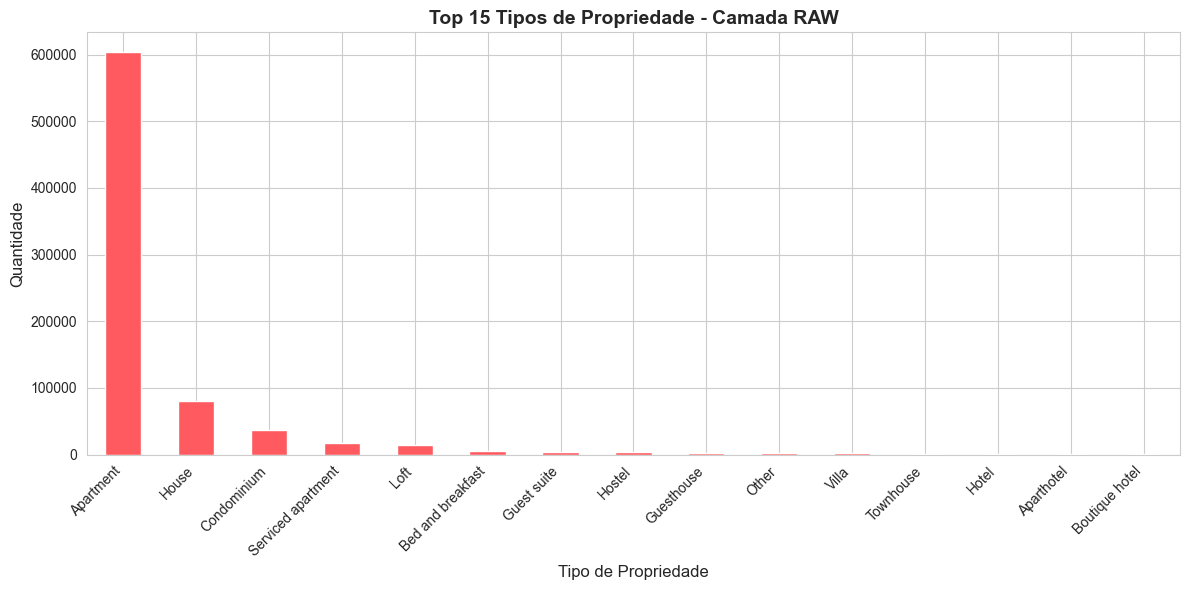


📊 Total de tipos distintos: 48


In [8]:
# Distribuição de tipos de propriedade
if 'property_type' in df_raw.columns:
    property_counts = df_raw['property_type'].value_counts().head(15)
    
    plt.figure(figsize=(12, 6))
    property_counts.plot(kind='bar', color=AIRBNB_RED)
    plt.title('Top 15 Tipos de Propriedade - Camada RAW', fontsize=14, fontweight='bold')
    plt.xlabel('Tipo de Propriedade', fontsize=12)
    plt.ylabel('Quantidade', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    print(f"\n📊 Total de tipos distintos: {df_raw['property_type'].nunique()}")
else:
    print("⚠️ Coluna 'property_type' não encontrada")

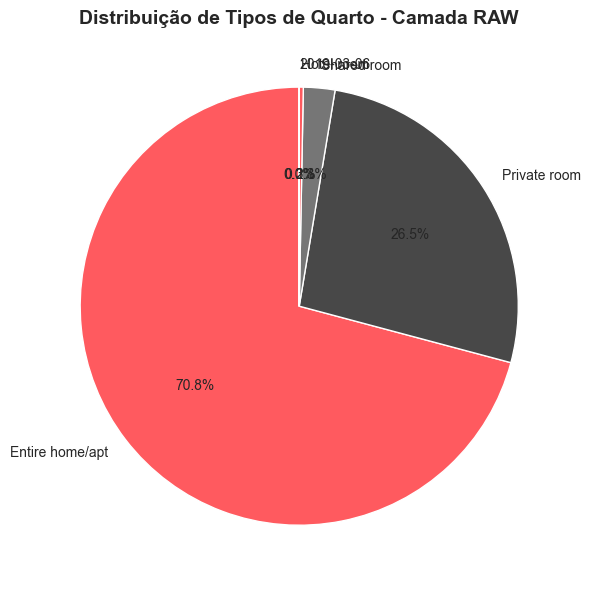


📊 Contagem por tipo de quarto:
room_type
Entire home/apt    555541
Private room       208024
Shared room         18219
Hotel room           2336
2019-03-06              1
Name: count, dtype: int64


In [9]:
# Distribuição de tipos de quarto
if 'room_type' in df_raw.columns:
    plt.figure(figsize=(10, 6))
    room_counts = df_raw['room_type'].value_counts()
    
    colors = [AIRBNB_RED, AIRBNB_DARK, AIRBNB_GRAY]
    plt.pie(room_counts, labels=room_counts.index, autopct='%1.1f%%', 
            colors=colors[:len(room_counts)], startangle=90)
    plt.title('Distribuição de Tipos de Quarto - Camada RAW', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    print("\n📊 Contagem por tipo de quarto:")
    print(room_counts)
else:
    print("⚠️ Coluna 'room_type' não encontrada")

## 5. Análise de Preços (Dados Brutos)

In [10]:
# Análise de preços
if 'price' in df_raw.columns:
    # Tentar converter preços (podem estar em formato string com $)
    try:
        if df_raw['price'].dtype == 'object':
            df_raw['price_numeric'] = df_raw['price'].str.replace('$', '').str.replace(',', '').astype(float)
        else:
            df_raw['price_numeric'] = df_raw['price']
        
        # Estatísticas de preço
        print("💰 Estatísticas de Preço (Dados Brutos):\n")
        print(f"Mínimo: ${df_raw['price_numeric'].min():,.2f}")
        print(f"Média: ${df_raw['price_numeric'].mean():,.2f}")
        print(f"Mediana: ${df_raw['price_numeric'].median():,.2f}")
        print(f"Máximo: ${df_raw['price_numeric'].max():,.2f}")
        print(f"Desvio Padrão: ${df_raw['price_numeric'].std():,.2f}")
        print(f"\nPreços = $0: {(df_raw['price_numeric'] == 0).sum()}")
        print(f"Preços ausentes: {df_raw['price_numeric'].isnull().sum()}")
        
    except Exception as e:
        print(f"⚠️ Erro ao processar preços: {e}")
else:
    print("⚠️ Coluna 'price' não encontrada")

💰 Estatísticas de Preço (Dados Brutos):

Mínimo: $0.00
Média: $654.32
Mediana: $297.00
Máximo: $138,288.00
Desvio Padrão: $1,736.65

Preços = $0: 209
Preços ausentes: 1


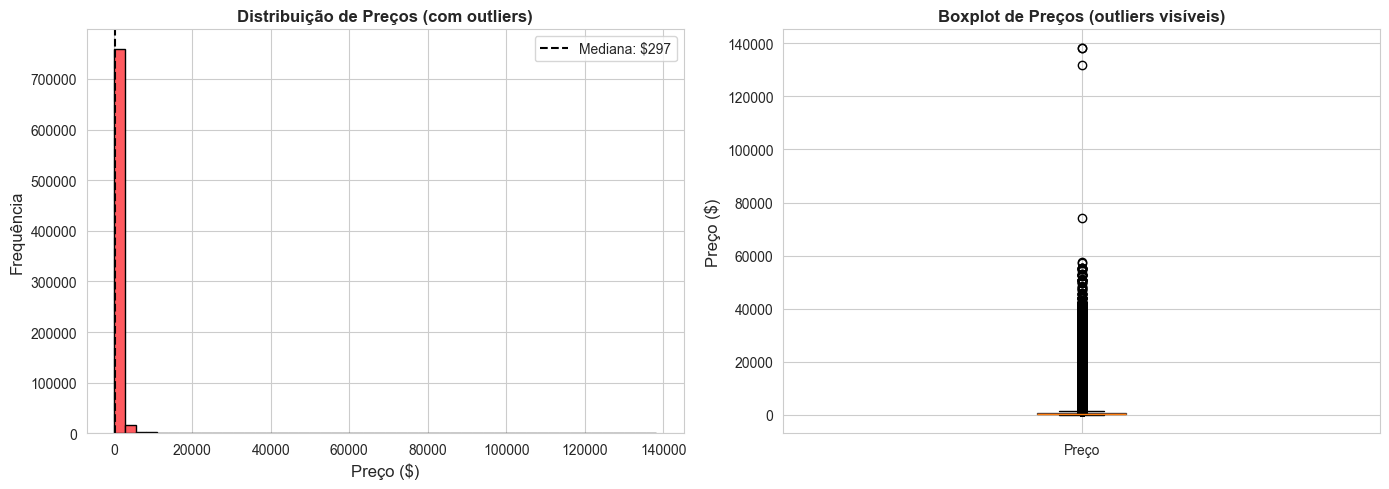

In [11]:
# Distribuição de preços com outliers
if 'price_numeric' in df_raw.columns:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Histograma
    axes[0].hist(df_raw['price_numeric'].dropna(), bins=50, color=AIRBNB_RED, edgecolor='black')
    axes[0].set_xlabel('Preço ($)', fontsize=12)
    axes[0].set_ylabel('Frequência', fontsize=12)
    axes[0].set_title('Distribuição de Preços (com outliers)', fontsize=12, fontweight='bold')
    axes[0].axvline(df_raw['price_numeric'].median(), color='black', linestyle='--', label=f"Mediana: ${df_raw['price_numeric'].median():.0f}")
    axes[0].legend()
    
    # Boxplot
    axes[1].boxplot(df_raw['price_numeric'].dropna(), vert=True, patch_artist=True,
                    boxprops=dict(facecolor=AIRBNB_RED, alpha=0.7))
    axes[1].set_ylabel('Preço ($)', fontsize=12)
    axes[1].set_title('Boxplot de Preços (outliers visíveis)', fontsize=12, fontweight='bold')
    axes[1].set_xticklabels(['Preço'])
    
    plt.tight_layout()
    plt.show()

## 6. Análise Geográfica (Latitude e Longitude)

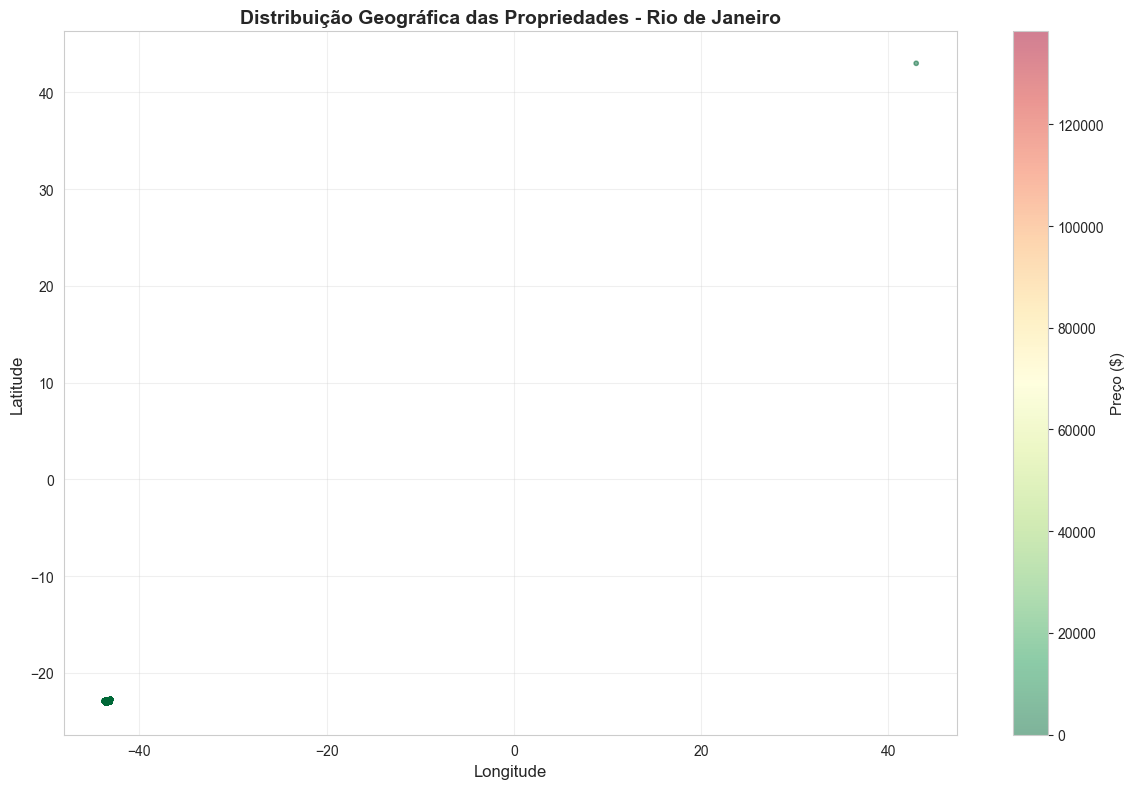


📍 Range de Latitude: -23.0734 a 43.0000
📍 Range de Longitude: -43.7389 a 43.0000


In [12]:
# Distribuição geográfica
if 'latitude' in df_raw.columns and 'longitude' in df_raw.columns:
    plt.figure(figsize=(12, 8))
    
    # Scatter plot de localização
    scatter = plt.scatter(df_raw['longitude'], df_raw['latitude'], 
                         c=df_raw.get('price_numeric', 'blue'), 
                         cmap='RdYlGn_r', alpha=0.5, s=10)
    
    plt.xlabel('Longitude', fontsize=12)
    plt.ylabel('Latitude', fontsize=12)
    plt.title('Distribuição Geográfica das Propriedades - Rio de Janeiro', fontsize=14, fontweight='bold')
    
    if 'price_numeric' in df_raw.columns:
        cbar = plt.colorbar(scatter)
        cbar.set_label('Preço ($)', fontsize=11)
    
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print(f"\n📍 Range de Latitude: {df_raw['latitude'].min():.4f} a {df_raw['latitude'].max():.4f}")
    print(f"📍 Range de Longitude: {df_raw['longitude'].min():.4f} a {df_raw['longitude'].max():.4f}")
else:
    print("⚠️ Colunas de latitude/longitude não encontradas")

## 7. Análise de Hosts

👥 Estatísticas de Hosts:

Total de hosts únicos: 47,254
Total de propriedades: 784,122
Média de propriedades por host: 16.59


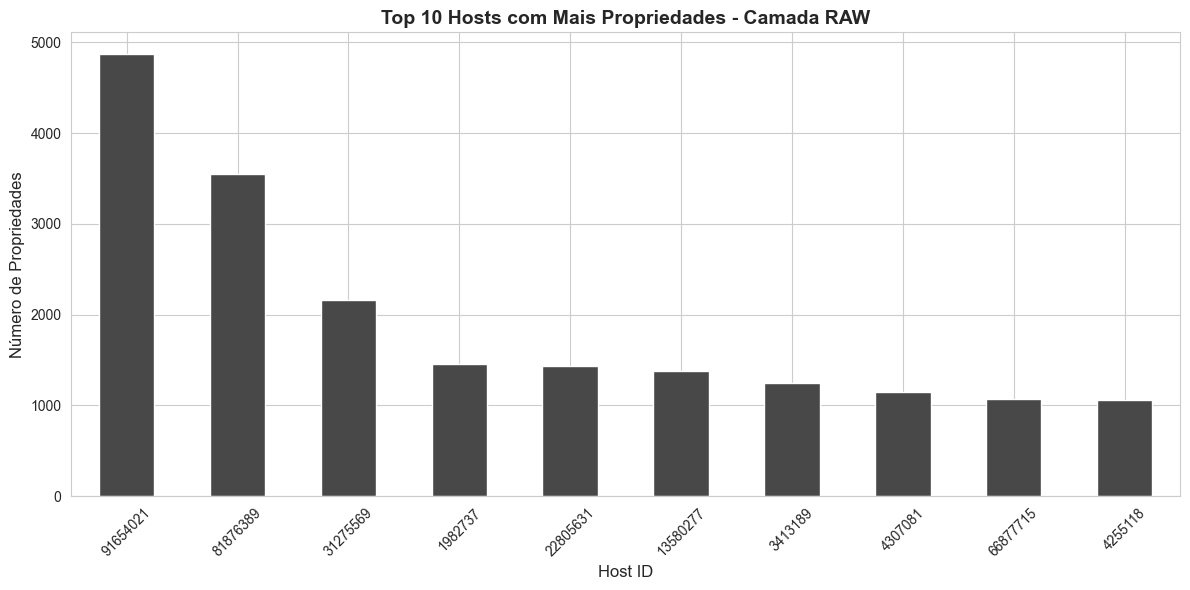

In [13]:
# Análise de hosts
if 'host_id' in df_raw.columns:
    print("👥 Estatísticas de Hosts:\n")
    print(f"Total de hosts únicos: {df_raw['host_id'].nunique():,}")
    print(f"Total de propriedades: {len(df_raw):,}")
    print(f"Média de propriedades por host: {len(df_raw) / df_raw['host_id'].nunique():.2f}")
    
    # Hosts com mais propriedades
    host_counts = df_raw['host_id'].value_counts().head(10)
    
    plt.figure(figsize=(12, 6))
    host_counts.plot(kind='bar', color=AIRBNB_DARK)
    plt.title('Top 10 Hosts com Mais Propriedades - Camada RAW', fontsize=14, fontweight='bold')
    plt.xlabel('Host ID', fontsize=12)
    plt.ylabel('Número de Propriedades', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Coluna 'host_id' não encontrada")

## 8. Análise de Avaliações

In [14]:
# Análise de avaliações
review_cols = [col for col in df_raw.columns if 'review' in col.lower()]

if review_cols:
    print(f"📝 Colunas de avaliação encontradas: {len(review_cols)}\n")
    
    # Estatísticas de number_of_reviews
    if 'number_of_reviews' in df_raw.columns:
        print("Estatísticas de Número de Avaliações:")
        print(df_raw['number_of_reviews'].describe())
        print(f"\nPropriedades sem avaliações: {(df_raw['number_of_reviews'] == 0).sum()} ({(df_raw['number_of_reviews'] == 0).sum() / len(df_raw) * 100:.1f}%)")
    
    # Scores de avaliação
    score_cols = [col for col in review_cols if 'score' in col.lower()]
    if score_cols:
        print(f"\n⭐ Colunas de pontuação: {len(score_cols)}")
        print(df_raw[score_cols].describe())
else:
    print("⚠️ Nenhuma coluna de avaliação encontrada")

📝 Colunas de avaliação encontradas: 12

Estatísticas de Número de Avaliações:
count    784121.000000
mean          8.008639
std          22.403821
min           0.000000
25%           0.000000
50%           1.000000
75%           5.000000
max         401.000000
Name: number_of_reviews, dtype: float64

Propriedades sem avaliações: 363826 (46.4%)

⭐ Colunas de pontuação: 7
       review_scores_rating  review_scores_accuracy  \
count         399183.000000           398713.000000   
mean              94.483751                9.624030   
std                9.514523                0.924483   
min                0.000000                1.000000   
25%               93.000000               10.000000   
50%               98.000000               10.000000   
75%              100.000000               10.000000   
max              100.000000               10.000000   

       review_scores_cleanliness  review_scores_checkin  \
count              398852.000000          398665.000000   
mean        

## 9. Análise de Capacidade e Comodidades

🏠 Estatísticas de Capacidade:

            bedrooms           beds      bathrooms
count  783346.000000  781787.000000  782628.000000
mean        1.644332       2.595179       1.693265
std         1.076565       2.073158       1.224674
min         0.000000       0.000000       0.000000
25%         1.000000       1.000000       1.000000
50%         1.000000       2.000000       1.000000
75%         2.000000       3.000000       2.000000
max        45.000000      86.000000     200.000000
            bedrooms           beds      bathrooms
count  783346.000000  781787.000000  782628.000000
mean        1.644332       2.595179       1.693265
std         1.076565       2.073158       1.224674
min         0.000000       0.000000       0.000000
25%         1.000000       1.000000       1.000000
50%         1.000000       2.000000       1.000000
75%         2.000000       3.000000       2.000000
max        45.000000      86.000000     200.000000


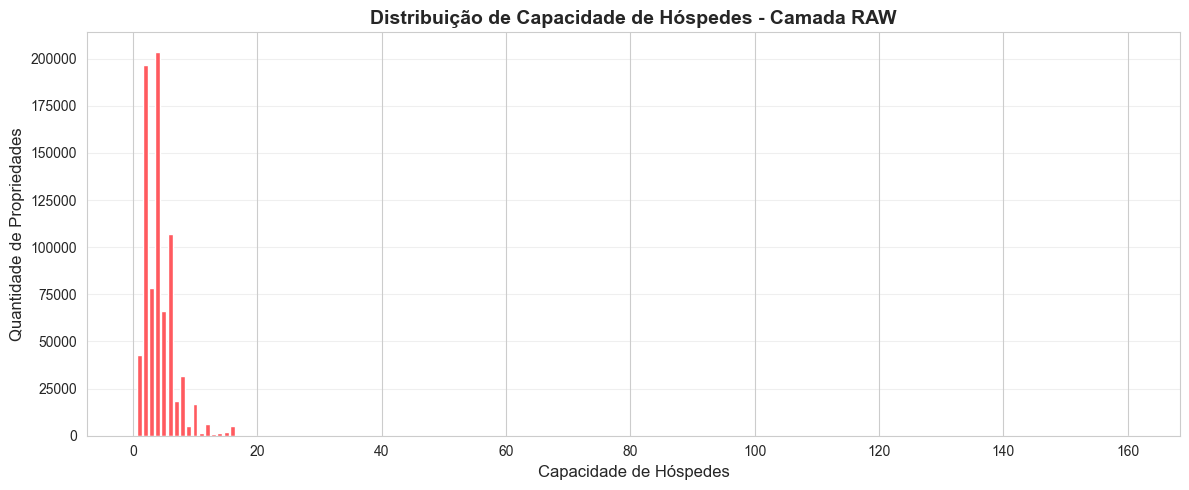

In [16]:
# Análise de capacidade
capacity_cols = ['accommodates', 'bedrooms', 'beds', 'bathrooms']
available_cols = [col for col in capacity_cols if col in df_raw.columns]

if available_cols:
    print("🏠 Estatísticas de Capacidade:\n")
    print(df_raw[available_cols].describe())
    
    # Distribuição de capacidade
    if 'accommodates' in df_raw.columns:
        plt.figure(figsize=(12, 5))
        
        # Converter para numérico, ignorando erros
        accommodates_numeric = pd.to_numeric(df_raw['accommodates'], errors='coerce')
        accommodates_counts = accommodates_numeric.value_counts().sort_index()
        
        plt.bar(accommodates_counts.index, accommodates_counts.values, color=AIRBNB_RED)
        plt.xlabel('Capacidade de Hóspedes', fontsize=12)
        plt.ylabel('Quantidade de Propriedades', fontsize=12)
        plt.title('Distribuição de Capacidade de Hóspedes - Camada RAW', fontsize=14, fontweight='bold')
        plt.grid(axis='y', alpha=0.3)
        plt.tight_layout()
        plt.show()
else:
    print("⚠️ Colunas de capacidade não encontradas")

## 10. Resumo de Qualidade dos Dados

In [17]:
# Resumo geral de qualidade
print("="*60)
print("📋 RESUMO DE QUALIDADE DOS DADOS - CAMADA RAW")
print("="*60)
print(f"\n📦 Dimensões: {df_raw.shape[0]:,} linhas × {df_raw.shape[1]} colunas")
print(f"💾 Tamanho: {df_raw.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"\n🔍 Valores Ausentes:")
print(f"   - Total de células ausentes: {df_raw.isnull().sum().sum():,}")
print(f"   - Percentual geral: {df_raw.isnull().sum().sum() / (df_raw.shape[0] * df_raw.shape[1]) * 100:.2f}%")
print(f"   - Colunas afetadas: {(df_raw.isnull().sum() > 0).sum()} de {df_raw.shape[1]}")
print(f"\n📊 Tipos de Dados:")
print(df_raw.dtypes.value_counts())
print(f"\n✅ Análise exploratória da camada RAW concluída!")
print(f"\n⚠️ Próximos passos: Limpeza e transformação para camada SILVER")
print("="*60)

📋 RESUMO DE QUALIDADE DOS DADOS - CAMADA RAW

📦 Dimensões: 784,122 linhas × 109 colunas
💾 Tamanho: 4992.94 MB

🔍 Valores Ausentes:
💾 Tamanho: 4992.94 MB

🔍 Valores Ausentes:
   - Total de células ausentes: 18,178,520
   - Total de células ausentes: 18,178,520
   - Percentual geral: 21.27%
   - Percentual geral: 21.27%
   - Colunas afetadas: 102 de 109

📊 Tipos de Dados:
object     72
float64    37
Name: count, dtype: int64

✅ Análise exploratória da camada RAW concluída!

⚠️ Próximos passos: Limpeza e transformação para camada SILVER
   - Colunas afetadas: 102 de 109

📊 Tipos de Dados:
object     72
float64    37
Name: count, dtype: int64

✅ Análise exploratória da camada RAW concluída!

⚠️ Próximos passos: Limpeza e transformação para camada SILVER
